by Mochamad Galuh Saputra

# Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
#sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
path = "/content/drive/MyDrive/Bootcamp Data Science Rakamin/Clicked Ads Dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.head(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
nums = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
cats = ['Male','Clicked on Ad','city','province','category']
new_columns = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Gender','Clicked on Ad']

In [ ]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

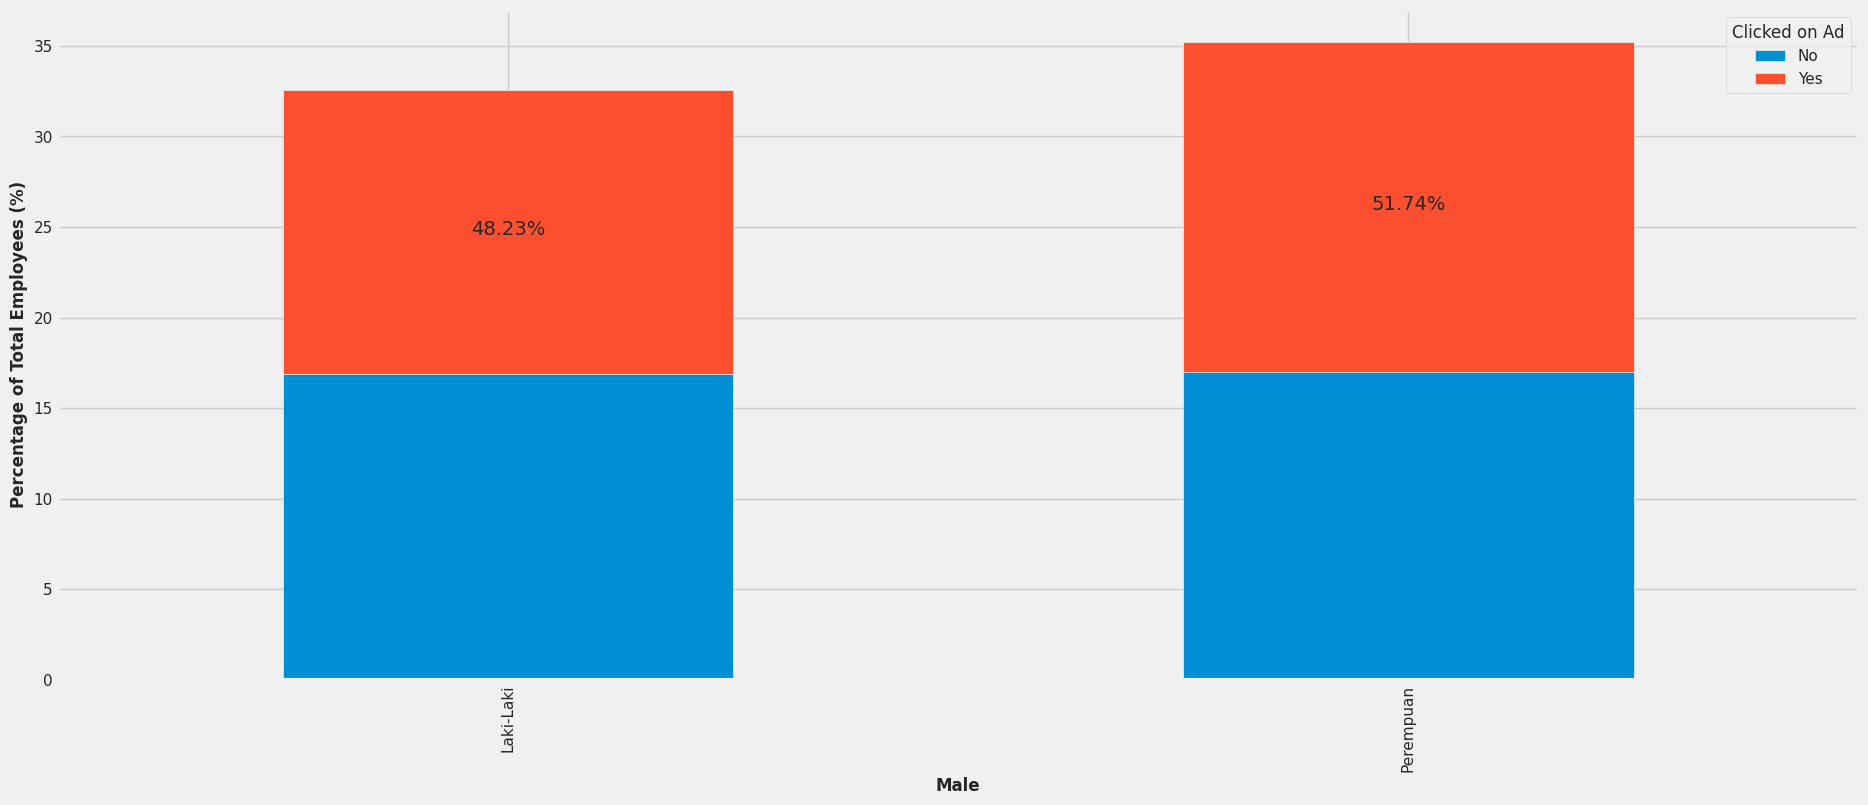

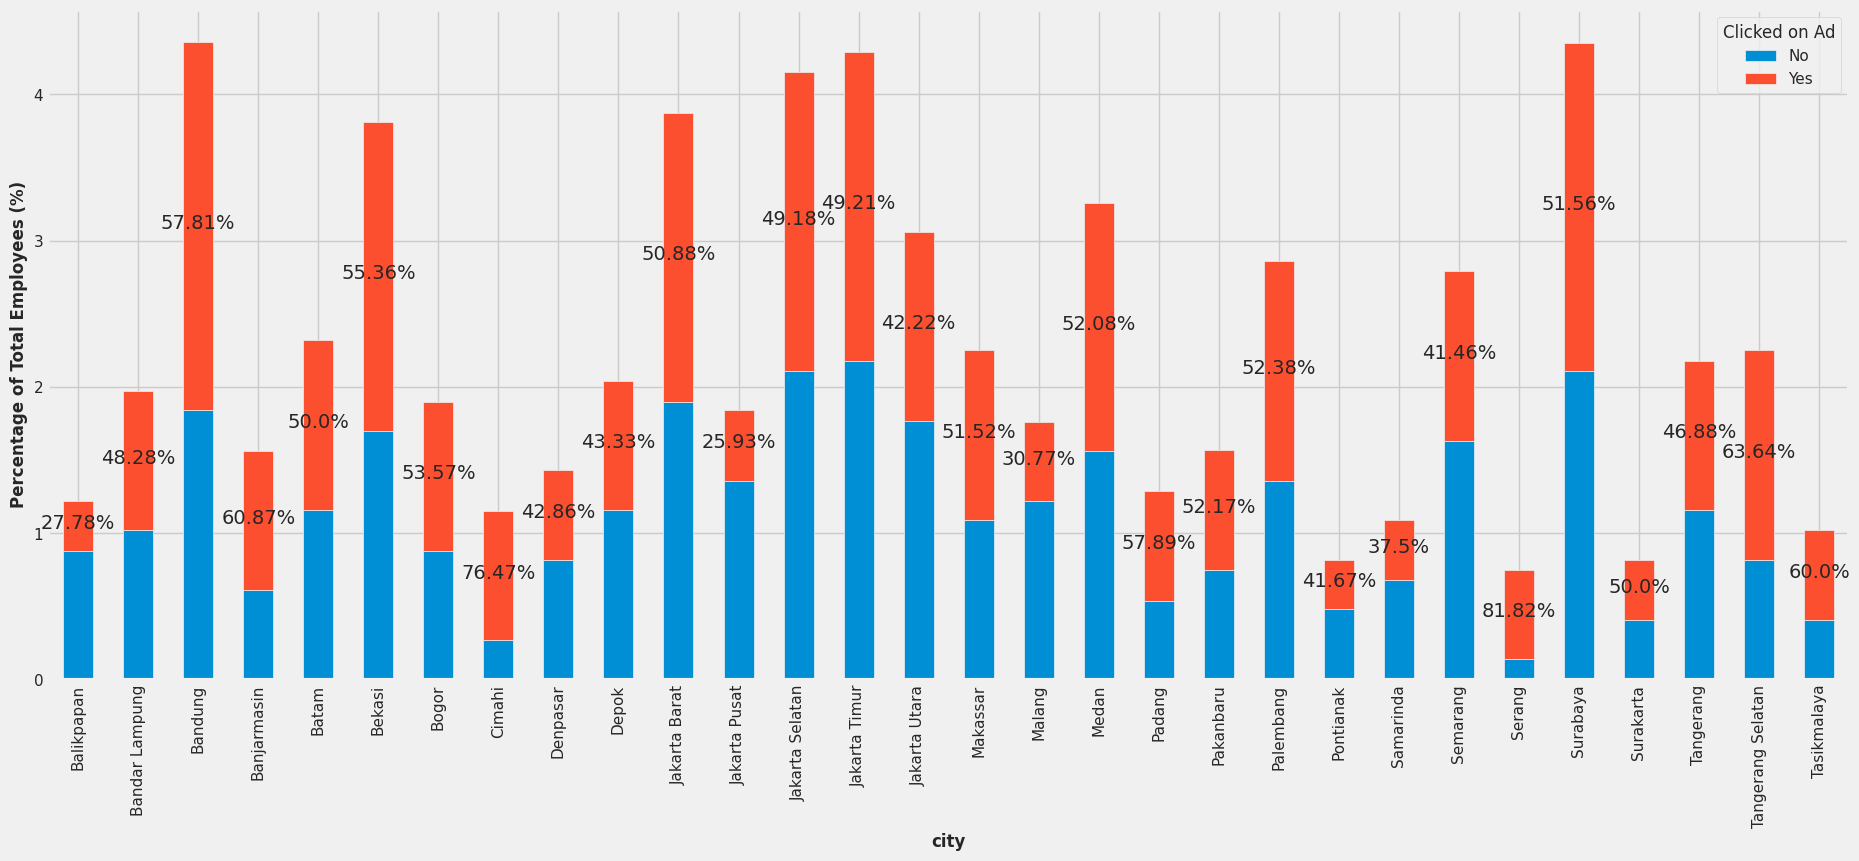

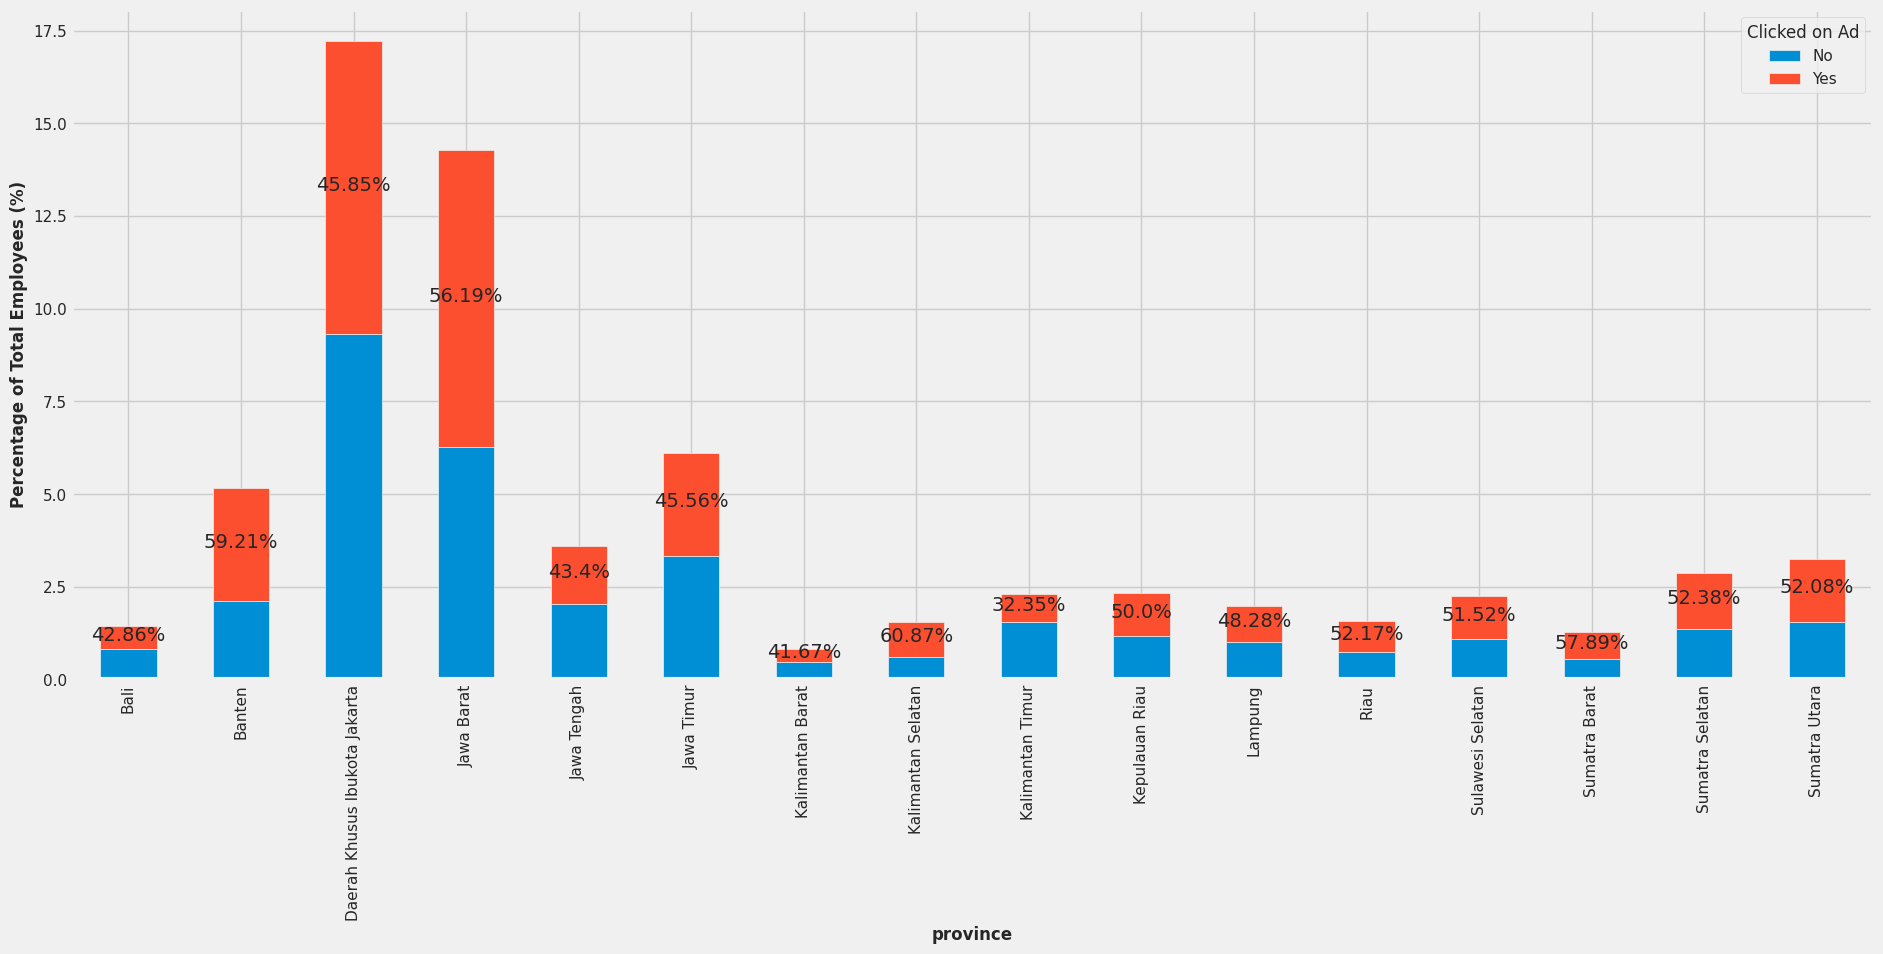

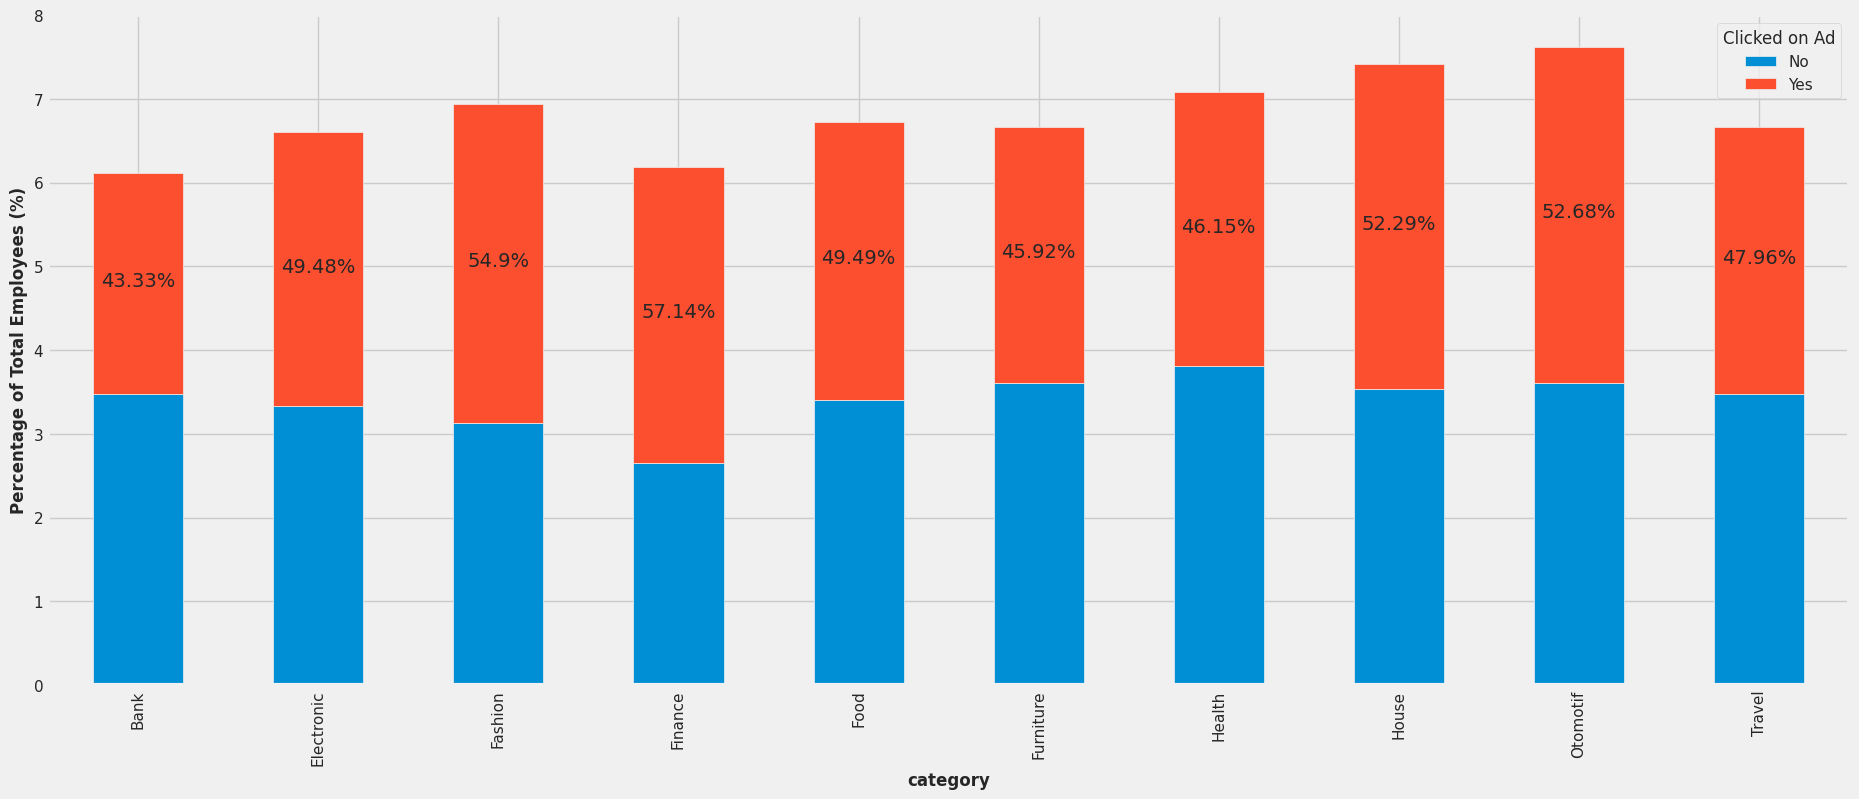

In [ ]:
# Visualisasi barplot presentase fitur kategorik terhadap target

for col in cats:
  if col != 'Clicked on Ad':
    dfg = df.groupby([col, 'Clicked on Ad'])['Unnamed: 0'].nunique().reset_index()

    dfg_a = df.groupby([col, 'Clicked on Ad'])['Unnamed: 0'].nunique().reset_index()
    dfg = df.groupby(col)['Unnamed: 0'].nunique().reset_index()

    dfg['total_df'] = [1470 for y in range(df[col].nunique())]

    dfg.rename(columns={'Unnamed: 0':'total_fitur'}, inplace=True)
    dfg_a.rename(columns={'Unnamed: 0':'subtotal'}, inplace=True)
    dfg_merge = dfg_a.merge(dfg, how='left')
    dfg_merge['ratio'] = round(dfg_merge['subtotal']/dfg_merge['total_df']*100, 2)
    dfg_merge['sub_ratio']=round(dfg_merge['subtotal']/dfg_merge['total_fitur']*100, 2)

    dfg_merge1 = dfg_merge.pivot_table(index=col, columns='Clicked on Ad', values='sub_ratio')
    dfg_merge2 = dfg_merge.pivot_table(index=col, columns='Clicked on Ad', values='ratio')

    dfg_merge2

    bar = dfg_merge2.plot(kind = 'bar', stacked = True)
    for i in bar.containers[int(len(bar.containers)/2):]:
        bar.bar_label(i, padding = 2, fmt = "{:0,.2f}%", label_type='center', labels = [f'{x}%' for x in dfg_merge1['Yes'].values])
    plt.ylabel('Percentage of Total Employees (%)', fontsize=12, fontweight = 'bold')
    plt.xlabel(col, fontsize=12, fontweight = 'bold')
    plt.show()


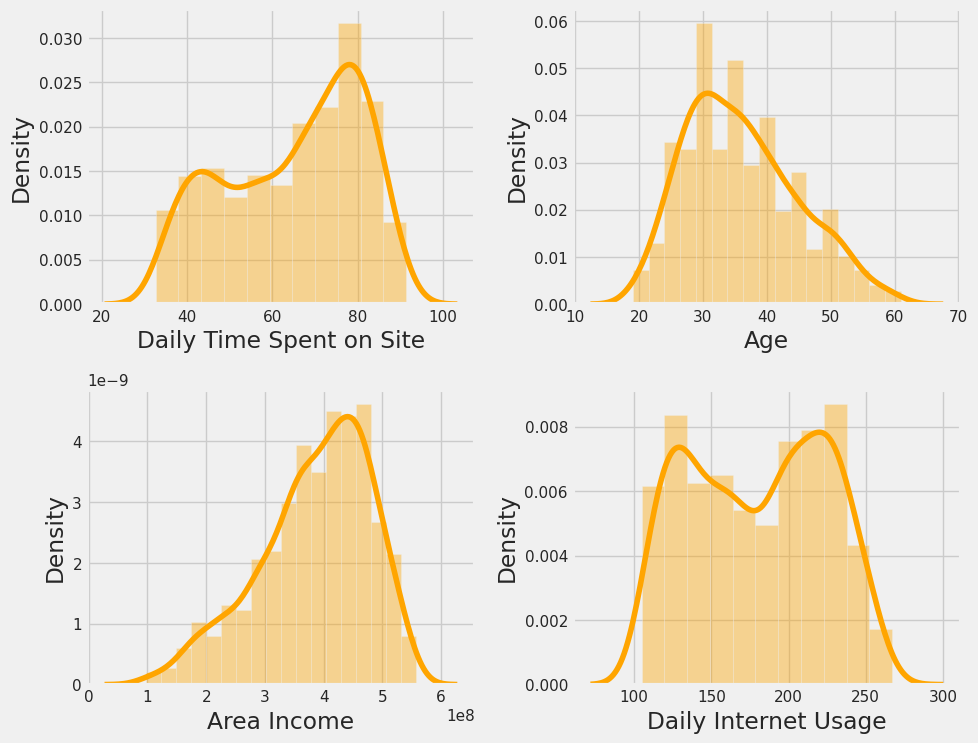

In [ ]:
# Displot Visualization

plt.figure(figsize=(10, 30))
for i in range(0, len(nums)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[nums[i]], color='orange')
    plt.tight_layout()

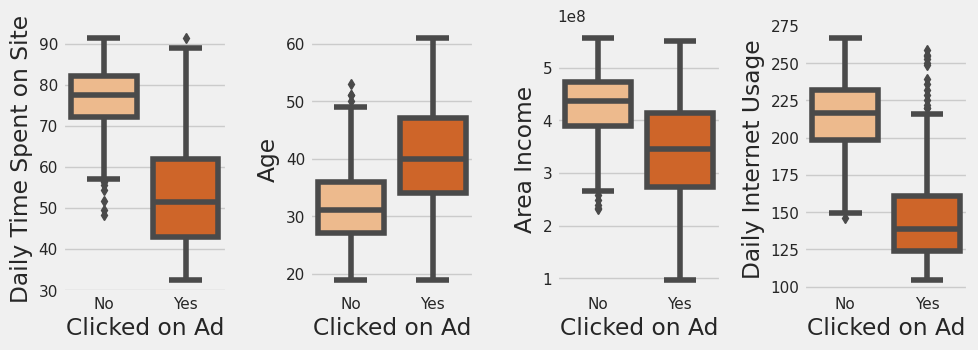

In [ ]:
# boxplot visualization

plt.figure(figsize=(10, 20))
for i in range(0, len(nums)):
    plt.subplot(6, 4, i+1)
    sns.boxplot(data = df, y=df[nums[i]], palette='Oranges', x='Clicked on Ad')
    plt.tight_layout()

plt.show()

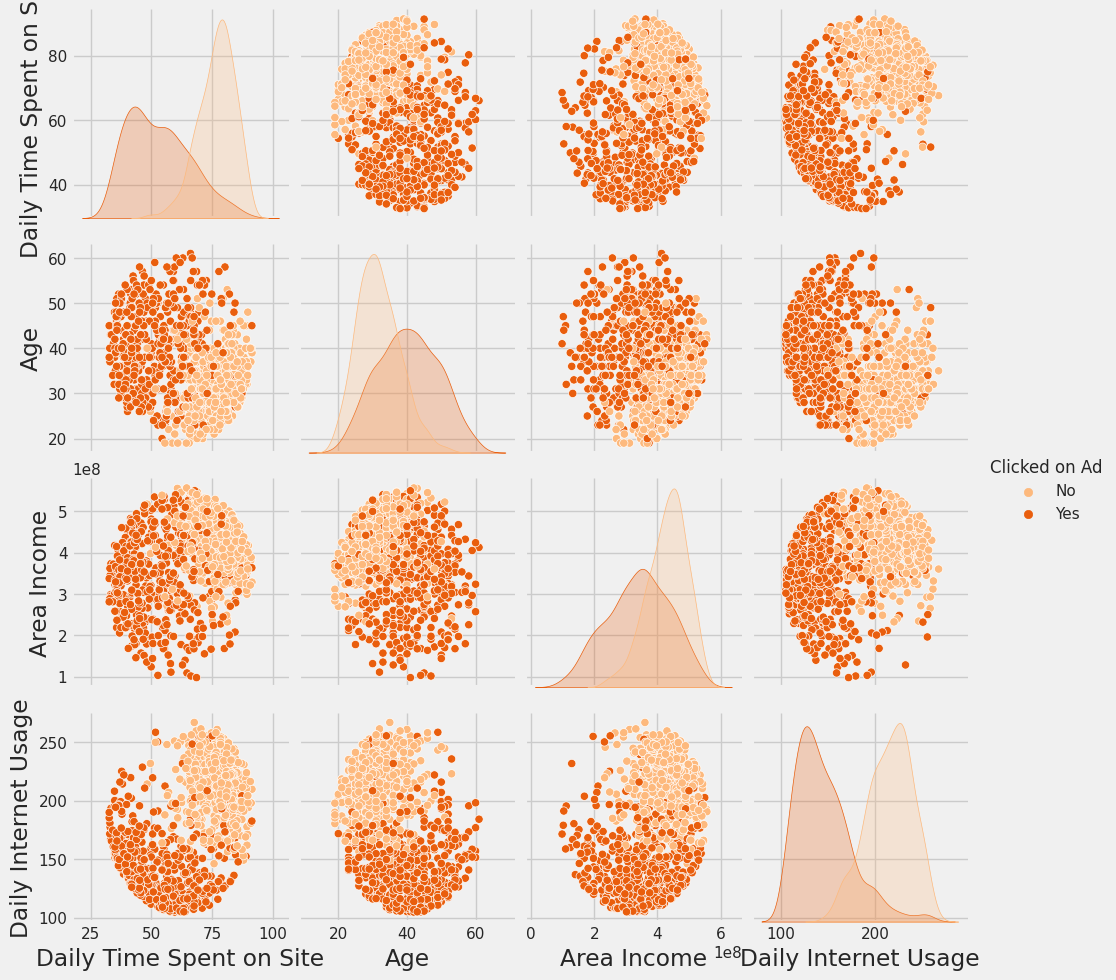

In [ ]:
sns.pairplot(df[nums + ['Clicked on Ad']], hue='Clicked on Ad', diag_kind='kde', palette='Oranges')
plt.show()


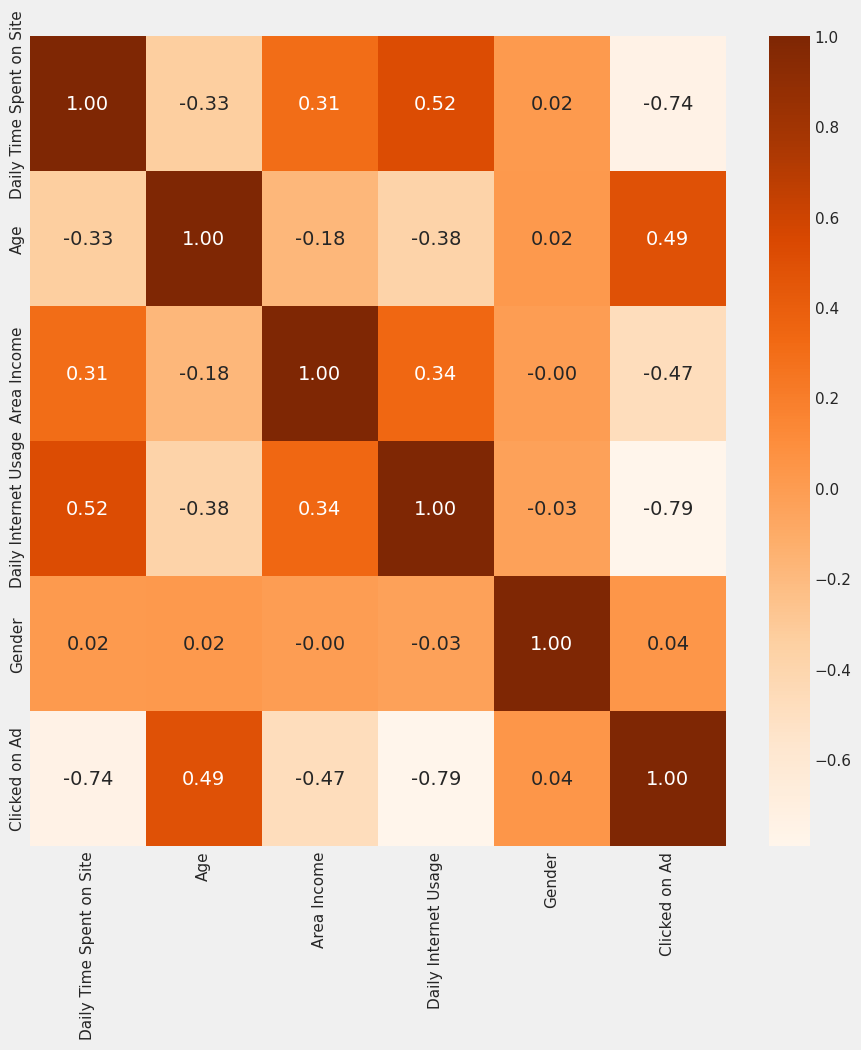

In [ ]:
# Heat Map (Correlation)
plt.figure(figsize=(10, 10))
sns.heatmap(dfe[new_columns].corr(), cmap='Oranges', annot=True, fmt='.2f')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Mengidentifikasi kolom kategorikal
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Looping untuk menghitung chi-square dan p-value
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Clicked on Ad'])  # Ganti 'Clicked on Ad' dengan kolom target yang sesuai
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degree of freedom: {dof}")
    print("Expected values:\n", expected)
    print("--------------")


Results for Male:
Chi-square statistic: 1.0913599109174903
P-value: 0.29617009291712565
Degree of freedom: 1
Expected values:
 [[239.25977934 239.74022066]
 [258.74022066 259.25977934]]
--------------
Results for Timestamp:
Chi-square statistic: 998.0
P-value: 0.47619077064059806
Degree of freedom: 996
Expected values:
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ...
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
--------------
Results for Clicked on Ad:
Chi-square statistic: 996.004
P-value: 1.3269482792741334e-218
Degree of freedom: 1
Expected values:
 [[250. 250.]
 [250. 250.]]
--------------
Results for city:
Chi-square statistic: 34.94701520224854
P-value: 0.20628493238538614
Degree of freedom: 29
Expected values:
 [[ 9.   9. ]
 [14.5 14.5]
 [32.  32. ]
 [11.5 11.5]
 [17.  17. ]
 [28.  28. ]
 [14.  14. ]
 [ 8.5  8.5]
 [10.5 10.5]
 [15.  15. ]
 [28.5 28.5]
 [13.5 13.5]
 [30.5 30.5]
 [31.5 31.5]
 [22.5 22.5]
 [16.5 16.5]
 [13.  13. ]
 [24.  24. ]
 [ 9.5  9.5]
 [11.5 11.5]
 [21.  21. ]
 [ 6.   6. ]
 [ 8.  

Hasil analisis chi-square memberikan informasi penting tentang hubungan antara kolom kategorikal dengan kolom target 'Clicked on Ad'. Berikut adalah beberapa intepretasi hasilnya:

1. **Male**:
   - Chi-square statistic yang relatif rendah (1.09) menunjukkan bahwa tidak ada hubungan yang signifikan antara jenis kelamin (Male) dengan apakah seseorang mengklik iklan atau tidak.

2. **Timestamp**:
   - Nilai p-value yang tinggi (0.47) menunjukkan bahwa tidak ada hubungan yang signifikan antara timestamp (waktu) dengan apakah seseorang mengklik iklan atau tidak.

3. **Clicked on Ad**:
   - Chi-square statistic yang tinggi (996.004) dan p-value yang sangat rendah menunjukkan bahwa variabel ini memiliki hubungan yang signifikan dengan tindakan mengklik iklan.

4. **City**:
   - Nilai p-value yang cukup tinggi (0.21) menunjukkan bahwa tidak ada bukti signifikan untuk hubungan antara kota tempat tinggal dengan apakah seseorang mengklik iklan atau tidak.

5. **Province**:
   - Nilai p-value (0.38) menunjukkan tidak ada bukti signifikan untuk hubungan antara provinsi tempat tinggal dengan apakah seseorang mengklik iklan atau tidak.

6. **Category**:
   - Nilai p-value yang tinggi (0.69) menunjukkan bahwa tidak ada hubungan yang signifikan antara kategori tertentu dengan tindakan mengklik iklan.

Dengan demikian, dari hasil analisis chi-square ini, hanya variabel 'Clicked on Ad' yang menunjukkan hubungan yang signifikan dengan tindakan mengklik iklan. Variabel lainnya tidak memiliki hubungan yang signifikan dengan tindakan tersebut berdasarkan nilai p-value yang dihasilkan.

# Task 2

In [ ]:
df_2 = df.copy()

In [ ]:
df_2.head(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food


In [ ]:
df_2 = df_2.drop('Unnamed: 0', axis=1)

In [ ]:
df_2.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
count,987.000000,1000.000000,9.870000e+02,989.000000,997,1000,1000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,2,997,2,30,16,10
top,NaN,NaN,NaN,NaN,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,NaN,NaN,NaN,NaN,518,2,500,64,253,112
mean,64.929524,36.009000,3.848647e+08,179.863620,NaN,NaN,NaN,NaN,NaN,NaN
std,15.844699,8.785562,9.407999e+07,43.870142,NaN,NaN,NaN,NaN,NaN,NaN
min,32.600000,19.000000,9.797550e+07,104.780000,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.270000,29.000000,3.286330e+08,138.710000,NaN,NaN,NaN,NaN,NaN,NaN
50%,68.110000,35.000000,3.990683e+08,182.650000,NaN,NaN,NaN,NaN,NaN,NaN
75%,78.460000,42.000000,4.583554e+08,218.790000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
df_2.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
df_2.dropna(inplace=True)

In [ ]:
df_2.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [ ]:
df_2.duplicated().sum()

0

In [ ]:
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])
df_2['Timestamp'].sort_values(ascending = False)

580   2016-07-24 00:22:00
240   2016-07-23 14:47:00
117   2016-07-23 11:46:00
639   2016-07-23 06:18:00
719   2016-07-23 05:21:00
              ...        
758   2016-01-01 15:14:00
546   2016-01-01 08:27:00
930   2016-01-01 05:31:00
967   2016-01-01 03:35:00
452   2016-01-01 02:52:00
Name: Timestamp, Length: 963, dtype: datetime64[ns]

In [ ]:
df_2['year']=df_2.Timestamp.dt.year
df_2['month']=df_2.Timestamp.dt.month
df_2['week']=df_2.Timestamp.dt.isocalendar().week
df_2['day']=df_2.Timestamp.dt.day
df_2 = df_2.drop(['Timestamp'], axis=1)

In [ ]:
df_2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,year,month,week,day
0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,2016,6,22,3


## Encode

To avoid the curse of dimensionality, the city and province features are not encoded. and will be dropped.

In [ ]:
dfe = df_2.copy()

In [ ]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Male                      963 non-null    object 
 5   Clicked on Ad             963 non-null    object 
 6   city                      963 non-null    object 
 7   province                  963 non-null    object 
 8   category                  963 non-null    object 
 9   year                      963 non-null    int64  
 10  month                     963 non-null    int64  
 11  week                      963 non-null    UInt32 
 12  day                       963 non-null    int64  
dtypes: UInt32(1), float64(3), int64(4), object(5)
memory usage: 102.5

In [ ]:
dfe['Clicked on Ad'].value_counts()

Yes    485
No     478
Name: Clicked on Ad, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfe['Clicked on Ad'] = label_encoder.fit_transform(dfe['Clicked on Ad'])
print(dfe['Clicked on Ad'].value_counts())

1    485
0    478
Name: Clicked on Ad, dtype: int64


In [ ]:
dfe['Male'].value_counts()

Perempuan    502
Laki-Laki    461
Name: Male, dtype: int64

In [ ]:
dfe = dfe.rename(columns={'Male': 'Gender'})

label_encoder = LabelEncoder()
dfe['Gender'] = label_encoder.fit_transform(dfe['Gender'])
print(dfe['Gender'].value_counts())

1    502
0    461
Name: Gender, dtype: int64


In [ ]:
dfe['category'].value_counts()

Otomotif      108
House         105
Health        102
Furniture      97
Food           97
Fashion        96
Electronic     94
Travel         91
Bank           87
Finance        86
Name: category, dtype: int64

In [ ]:
dfe = pd.get_dummies(dfe, columns=['category'])

In [ ]:
dfe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,city,province,year,month,week,day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,1,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,2016,3,12,27,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,0,0,Denpasar,Bali,2016,4,14,4,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,1,0,Surabaya,Jawa Timur,2016,3,10,13,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,0,0,Batam,Kepulauan Riau,2016,1,1,10,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,1,0,Medan,Sumatra Utara,2016,6,22,3,0,0,0,1,0,0,0,0,0,0


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Gender                    963 non-null    int64  
 5   Clicked on Ad             963 non-null    int64  
 6   city                      963 non-null    object 
 7   province                  963 non-null    object 
 8   year                      963 non-null    int64  
 9   month                     963 non-null    int64  
 10  week                      963 non-null    UInt32 
 11  day                       963 non-null    int64  
 12  category_Bank             963 non-null    uint8  
 13  category_Electronic       963 non-null    uint8  
 14  category_F

In [ ]:
dft = dfe.copy()

In [ ]:
dft = dft.drop(['city','province'], axis=1)

In [ ]:
X = dft.drop(['Clicked on Ad'],axis=1,inplace=False)
y = dft['Clicked on Ad']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=422, stratify = y)

# Task 3

In [ ]:
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

In [ ]:
dft1 = dft.copy()
X1 = dft1.drop(['Clicked on Ad'],axis=1,inplace=False)
y1 = dft1['Clicked on Ad']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=422, stratify = y)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))

    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1)
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

# confusion matrix
from sklearn.metrics import confusion_matrix
def confusion(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

Experiment 1 Before Normalizing

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X1_train,y1_train)

y_train_pred = dt.predict(X1_train)
y_pred = dt.predict(X1_test)

eval_classification(dt, y_train_pred, y_pred, y1_train, y1_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 0.89
Recall (Train Set): 1.00
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.92


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X1_train, y1_train)

y_train_pred = rf.predict(X1_train)
y_pred = rf.predict(X1_test)

eval_classification(rf, y_train_pred, y_pred, y1_train, y1_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)],
                       min_samples_split=[2, 5, 10, 100],
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X1_train, y1_train)

y_train_pred = dt_tuned.predict(X1_train)
y_pred = dt_tuned.predict(X1_test)

eval_classification(dt_tuned, y_train_pred, y_pred, y1_train, y1_test)


Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.94
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.92
Recall (Test Set): 0.92
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
AUC (Train Set): 0.94
AUC (Test Set): 0.94


In [ ]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X1_train,y1_train)

y_train_pred = rf_tuned.predict(X1_train)
y_pred = rf_tuned.predict(X1_test)

eval_classification(rf_tuned, y_train_pred, y_pred, y1_train, y1_test)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.95
AUC (Train Set): 0.97
AUC (Test Set): 0.95


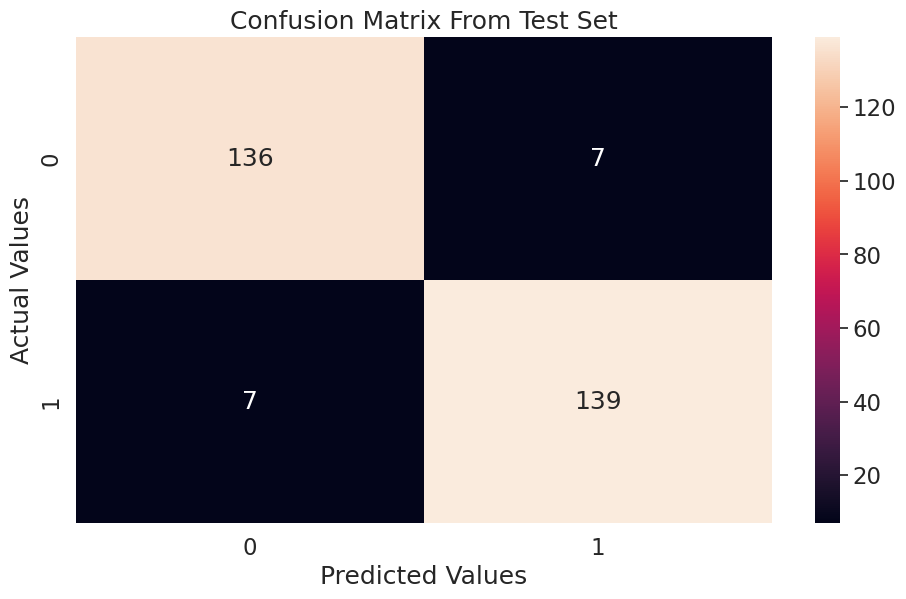

In [ ]:
confusion(y1_test,y_pred)

Experiment 2 After Normalizing

In [ ]:
dft2 = dft.copy()
X2 = dft2.drop(['Clicked on Ad'],axis=1,inplace=False)
y2 = dft1['Clicked on Ad']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=422, stratify = y)

In [ ]:
nums_clean = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','year','month','week','day']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in nums_clean:
  scaler = ss.fit(X2_train[[col]])

  X2_train[[col]] = ss.transform(X2_train[[col]])
  X2_test[[col]] = ss.transform(X2_test[[col]])

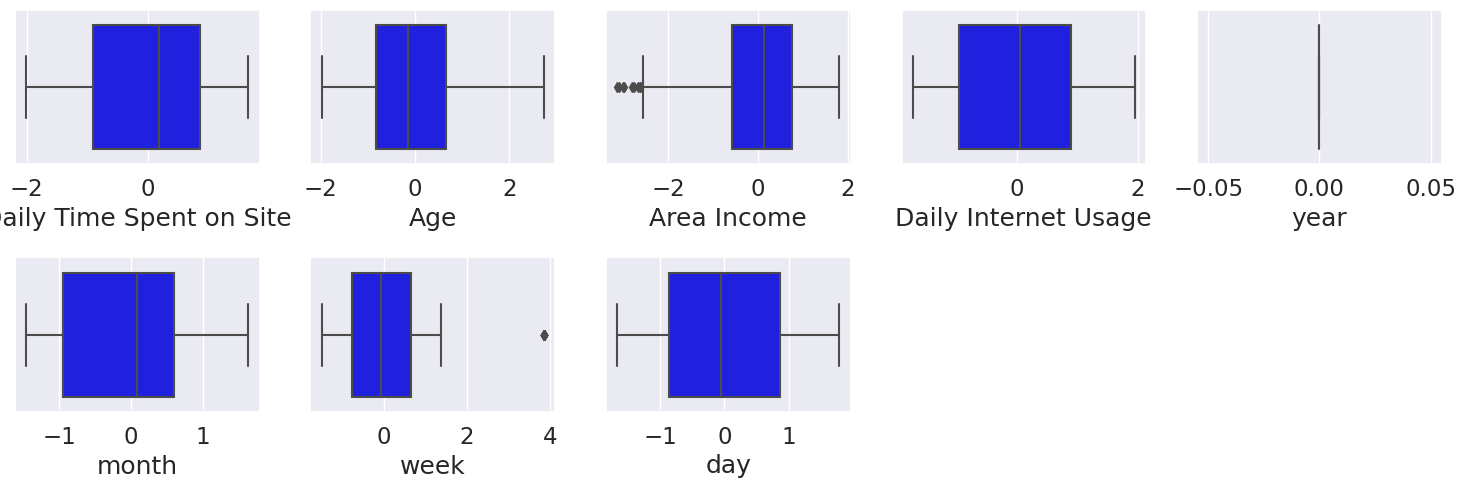

In [ ]:
plt.figure(figsize=(15, 12))
#Individual Displot
for i in range (0, len(nums_clean)):
  plt.subplot(5,5,i+1)
  sns.boxplot(x=X2_train[nums_clean[i]],color='blue')
  plt.xlabel(nums_clean[i])
  plt.tight_layout()

In [ ]:
y2_train.value_counts()

1    339
0    335
Name: Clicked on Ad, dtype: int64

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X2_train,y2_train)

y_train_pred = dt.predict(X2_train)
y_pred = dt.predict(X2_test)

eval_classification(dt, y_train_pred, y_pred, y2_train, y2_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.90
Recall (Train Set): 1.00
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.93


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X2_train, y2_train)

y_train_pred = rf.predict(X2_train)
y_pred = rf.predict(X2_test)

eval_classification(rf, y_train_pred, y_pred, y2_train, y2_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.96


Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)],
                       min_samples_split=[2, 5, 10, 100],
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt']
                      )

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='recall')
dt_tuned.fit(X2_train, y2_train)

y_train_pred = dt_tuned.predict(X2_train)
y_pred = dt_tuned.predict(X2_test)

eval_classification(dt_tuned, y_train_pred, y_pred, y2_train, y2_test)


Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.94
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.92
Recall (Test Set): 0.92
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
AUC (Train Set): 0.94
AUC (Test Set): 0.94


In [ ]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1])

rf = RandomForestClassifier(random_state=1)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=1, scoring='recall')
rf_tuned.fit(X2_train,y2_train)

y_train_pred = rf_tuned.predict(X2_train)
y_pred = rf_tuned.predict(X2_test)

eval_classification(rf_tuned, y_train_pred, y_pred, y2_train, y2_test)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.95
AUC (Train Set): 0.97
AUC (Test Set): 0.95


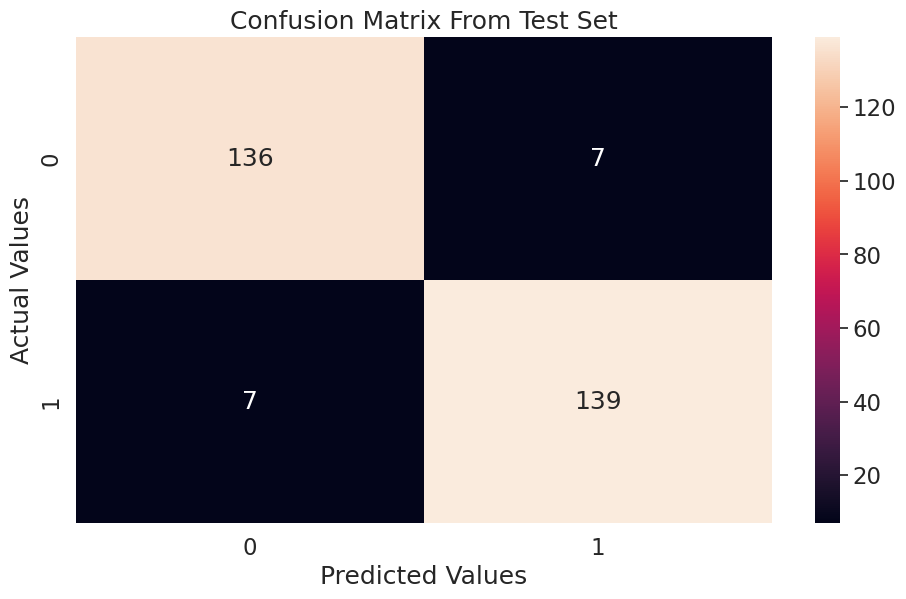

In [ ]:
confusion(y2_test,y_pred)

Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

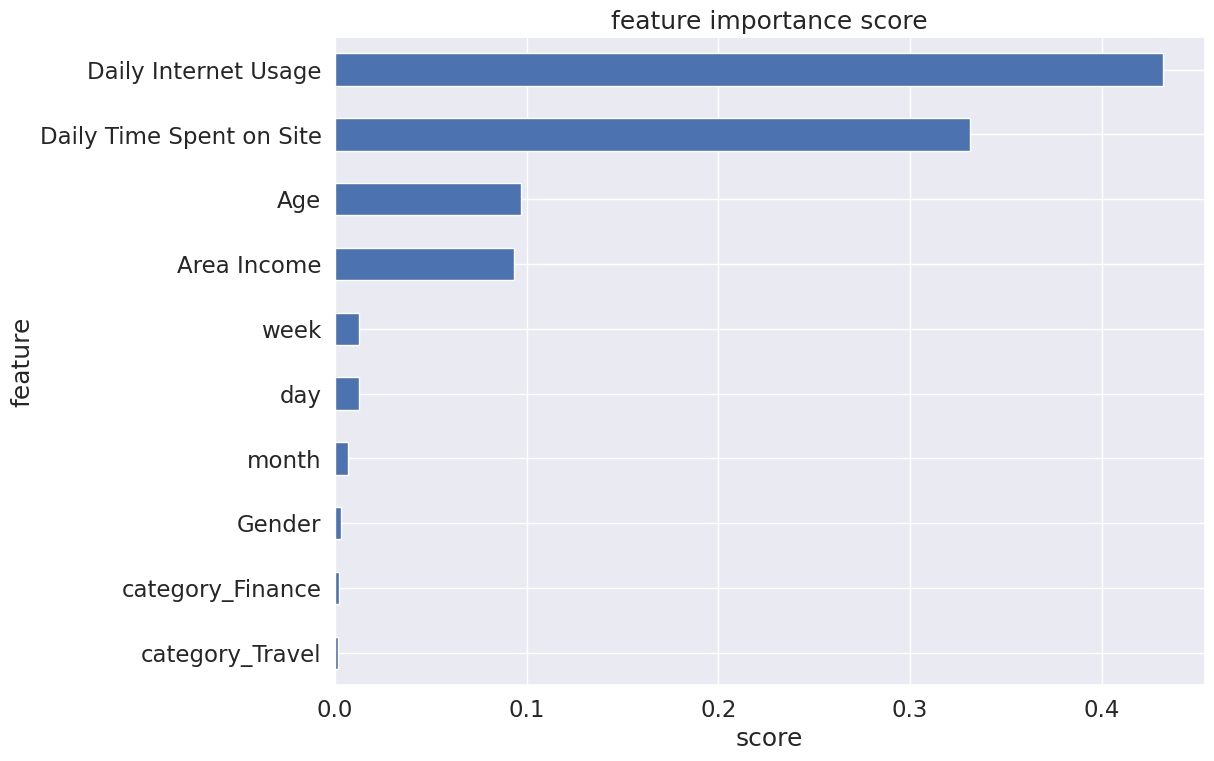

In [ ]:
best_model = rf_tuned.best_estimator_
show_feature_importance(best_model)

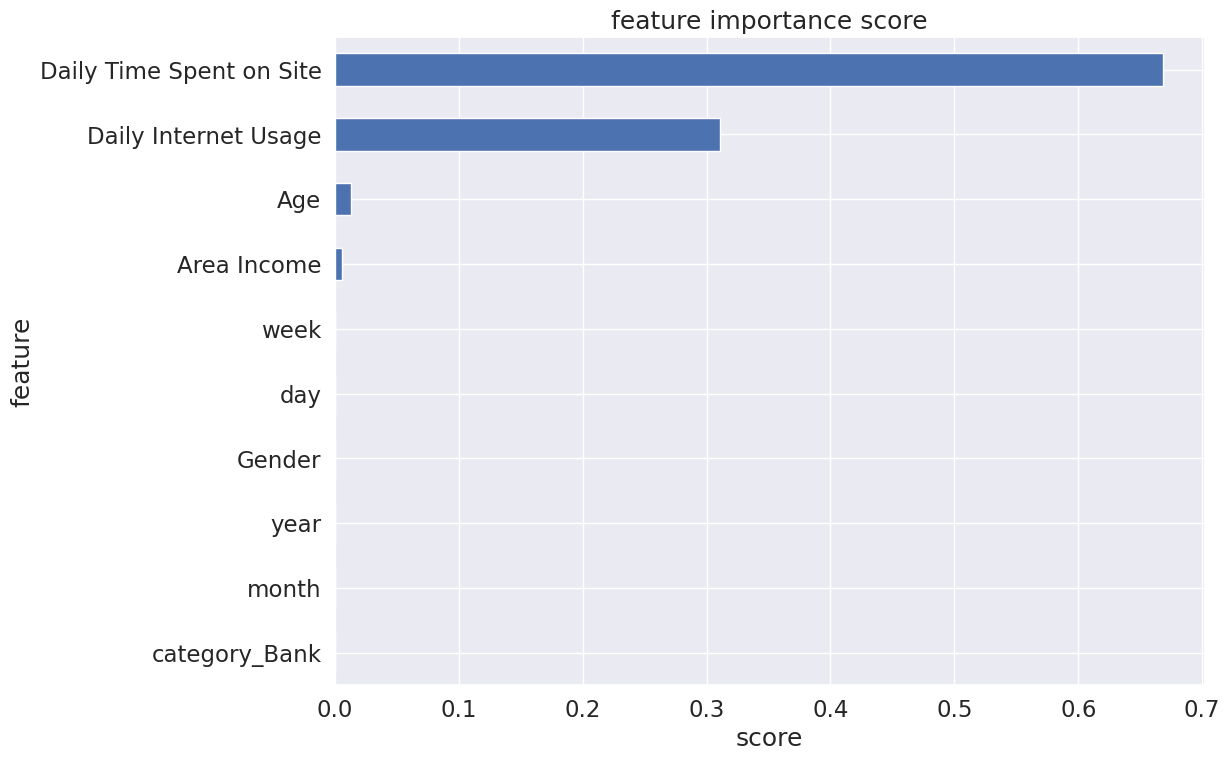

In [ ]:
best_model = dt_tuned.best_estimator_
show_feature_importance(best_model)